In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
dataset=pd.read_csv('dataset.csv')
dataset.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [7]:
dataset.isna().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [10]:
dataset=dataset.drop(columns=['lot_size','lot_size_units'])

In [11]:
dataset=dataset.drop(columns=['size_units'])

In [12]:
dataset.head()

,beds,baths,size,zip_code,price
0,3,2.5,2590.0,98144,795000.0
1,4,2.0,2240.0,98106,915000.0
2,4,3.0,2040.0,98107,950000.0
3,4,3.0,3800.0,98199,1950000.0
4,2,2.0,1042.0,98102,950000.0


In [15]:
dataset['beds'].count()

2016

In [17]:
dataset.shape

(2016, 5)

In [19]:
dataset.to_csv('final_dataset')

In [24]:
#Independent and Dependent feature
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [25]:
y.head()

0     795000.0
1     915000.0
2     950000.0
3    1950000.0
4     950000.0
Name: price, dtype: float64

In [26]:
X.head()

,beds,baths,size,zip_code
0,3,2.5,2590.0,98144
1,4,2.0,2240.0,98106
2,4,3.0,2040.0,98107
3,4,3.0,3800.0,98199
4,2,2.0,1042.0,98102


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [28]:
X_train.shape

(1411, 4)

In [30]:
y_train.shape

(1411,)

In [80]:
#Feature scaling
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler=StandardScaler()

In [81]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [82]:
#Implementing model in regression problem
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [83]:
regression.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred=regression.predict(X_test)

In [85]:
#EDA
from sklearn.metrics import accuracy_score,classification_report,r2_score
import seaborn as sns

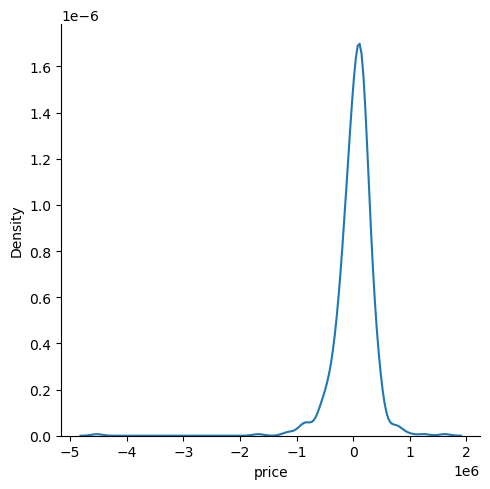

In [86]:
sns.displot(y_pred-y_test,kind='kde')

In [87]:
r2_score(y_test,y_pred)

0.6269512106248158

In [88]:
#Lasso and Ridge
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
parameter={
    'alpha':[1,2,3,4,5,6,7,9,10]
    
}

In [89]:
model=Lasso()
grid=GridSearchCV(model,parameter,scoring='neg_mean_squared_error',cv=10)

In [90]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 9, 10]},
             scoring='neg_mean_squared_error')

In [91]:
y_prediction=grid.predict(X_test)

In [92]:
r2_score(y_prediction,y_test)

0.281366935098587

In [93]:
grid.best_params_

{'alpha': 10}

In [94]:
grid.best_score_

-960477023020.4534

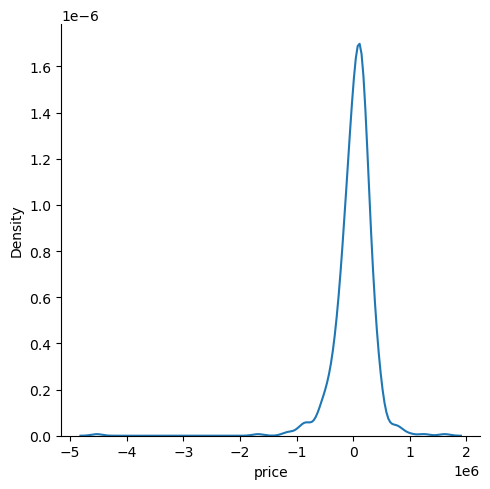

In [95]:
sns.displot(y_prediction-y_test,kind='kde')

In [111]:
import pickle

In [114]:
pickle.dump(regression,open('regessor.pkl','wb'))